In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Getting the data and preprocessing

In [4]:
df = pd.read_csv('adult.csv')
#Dropping education as educational num cover it
df.drop(["education"], axis = 1,  inplace=True)

#Converting the last column to 0s and 1s
df['income'].replace(['>50K', '<=50K'], [1, 0], inplace=True)

# Replacing ? with the most frequent value in each column
df['age'].replace( "?", df['age'].mode()[0], inplace=True)
df['workclass'].replace("?", df['workclass'].mode()[0], inplace=True)
df['fnlwgt'].replace("?", df['fnlwgt'].mode()[0], inplace=True)
df['educational-num'].replace("?",
                              df['educational-num'].mode()[0], inplace=True)
df['occupation'].replace("?", df['occupation'].mode()[0], inplace=True)
df['race'].replace("?", df['race'].mode()[0], inplace=True)
df['gender'].replace("?", df['gender'].mode()[0], inplace=True)
df['capital-gain'].replace("?", df['capital-gain'].mode()[0], inplace=True)
df['capital-loss'].replace("?", df['capital-loss'].mode()[0], inplace=True)
df['hours-per-week'].replace("?", df['hours-per-week'].mode()[0], inplace=True)
df['native-country'].replace("?", df['native-country'].mode()[0], inplace=True)


#Converting categorical variables to numberic values
df['workclass'].replace(df.workclass.unique(), [
                        i for i in range(len(df['workclass'].unique()))], inplace=True)
df['marital-status'].replace(df['marital-status'].unique(), [
    i for i in range(len((df['marital-status'].unique())))], inplace=True)
df['relationship'].replace(df['relationship'].unique(), [
    i for i in range(len(df['relationship'].unique()))], inplace=True)
df['gender'].replace(df['gender'].unique(), [
    i for i in range(len(df['gender'].unique()))], inplace=True)
df['native-country'].replace(df['native-country'].unique(), [
    i for i in range(len(df['native-country'].unique()))], inplace=True)
df['occupation'].replace(df['occupation'].unique(), [
    i for i in range(len(df['occupation'].unique()))], inplace=True)
df['race'].replace(df['race'].unique(), [
    i for i in range(len(df['race'].unique()))], inplace=True)

df.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,0,226802,7,0,0,0,0,0,0,0,40,0,0
1,38,0,89814,9,1,1,1,1,0,0,0,50,0,0
2,28,1,336951,12,1,2,1,1,0,0,0,40,0,1
3,44,0,160323,10,1,0,1,0,0,7688,0,40,0,1
4,18,0,103497,10,0,3,0,1,1,0,0,30,0,0


# Splitting data

In [15]:
# Split the data into features (X) and target (y)
X = df.drop('income', axis=1)
y = df['income']

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)

# Making the model

In [16]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# Model Evaluation

In [17]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[11720,   659],
       [ 2196,  1706]])

In [18]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = (2 * precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

Accuracy: 0.8246422209937965
Precision: 0.721353065539112
Recall: 0.4372116863147104
F1: 0.5444391255784268


# ROC curve

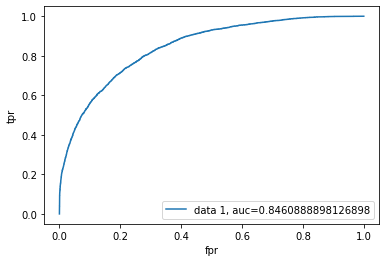

In [28]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()